# 【python できること】簡単！ARマーカーの作り方と認識する方法

In [1]:
# インストール
# !pip install opencv-contrib-python

In [2]:
import numpy as np
import cv2
from cv2 import aruco
import matplotlib.pyplot as plt

### ARマーカーの種類
http://bytedeco.org/javacpp-presets/opencv/apidocs/org/bytedeco/opencv/global/opencv_aruco.html

### ARマーカーを作成する

画像サイズ (150, 150)


True

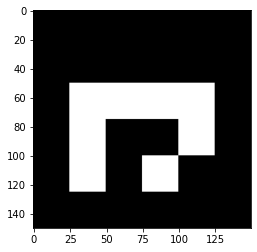

In [3]:
# マーカー種類を定義
aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_50)

# マーカー種類に応じて画像を
ar_id = 1
img_size = 150
ar_img = aruco.drawMarker(aruco_dict, ar_id, img_size)
print("画像サイズ", ar_img.shape)

# 画像表示
plt.imshow(ar_img, cmap = "gray")

# 画像保存
cv2.imwrite(f'{ar_id:02}.png', ar_img)

In [4]:
# 連結したARマーカー
def create_concat_ar(no_list, img_size = 100):
    aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_50)
    
    space_x = np.zeros([100,10]) + 255
    img = space_x
    for l in no_list:
        img = np.concatenate([img, aruco.drawMarker(aruco_dict, int(l), 100)], axis = 1)
        img = np.concatenate([img, space_x], axis = 1)
    
    space_y = np.zeros([10,img.shape[1]]) + 255
    img = np.concatenate([space_y, img], axis = 0)
    img = np.concatenate([img, space_y], axis = 0)
    return img

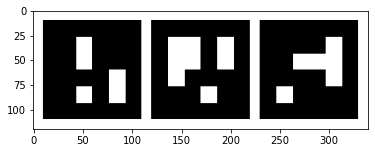

In [5]:
no_list = [30, 23, 40]
ar_img = create_concat_ar(no_list)
plt.imshow(ar_img, cmap="gray")

### ARマーカー検知

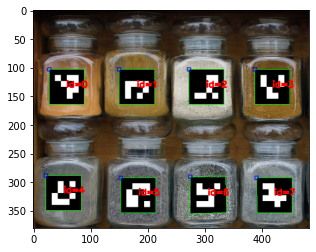

In [6]:
# 画像読み込み 
frame = cv2.imread("ar_sample.png")
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

# ARマーカー検知
aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_50)
parameters =  aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)

# 検知箇所を画像にマーキング
frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)
plt.imshow(frame_markers)

# cv2.imwrite('detect.png', cv2.cvtColor(frame_markers, cv2.COLOR_RGB2BGR))

### 座標の確認

In [7]:
# 座標とidの確認
for i in range(len(ids)):
    # 検知したidの4点取得
    c = corners[i][0]
    x1, x2, x3, x4 = c[:, 0]
    y1, y2, y3, y4 = c[:, 1]
    
    print(f"id={ids[i]}")
    print("X座標", x1, x2, x3, x4)
    print("Y座標", y1, y2, y3, y4)
    print("中心座標", c[:, 0].mean(), c[:, 1].mean())

id=[7]
X座標 390.0 452.0 452.0 391.0
Y座標 292.0 292.0 353.0 353.0
中心座標 421.25 322.5
id=[6]
X座標 274.0 336.0 338.0 272.0
Y座標 290.0 289.0 352.0 356.0
中心座標 305.0 321.75
id=[4]
X座標 22.0 84.0 84.0 22.0
Y座標 288.0 288.0 349.0 349.0
中心座標 53.0 318.5
id=[3]
X座標 387.0 448.0 448.0 387.0
Y座標 103.0 103.0 164.0 164.0
中心座標 417.5 133.5
id=[2]
X座標 272.0 333.0 333.0 272.0
Y座標 103.0 103.0 164.0 164.0
中心座標 302.5 133.5
id=[1]
X座標 150.0 212.0 212.0 150.0
Y座標 103.0 103.0 164.0 164.0
中心座標 181.0 133.5
id=[0]
X座標 28.0 89.0 89.0 28.0
Y座標 103.0 103.0 164.0 164.0
中心座標 58.5 133.5
id=[5]
X座標 153.0 214.0 214.0 153.0
Y座標 292.0 292.0 353.0 353.0
中心座標 183.5 322.5
